In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def func(x, fmax, kd):
    """Hill Equation"""
    n = 1
    return fmax * x**n / (kd**n + x**n)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

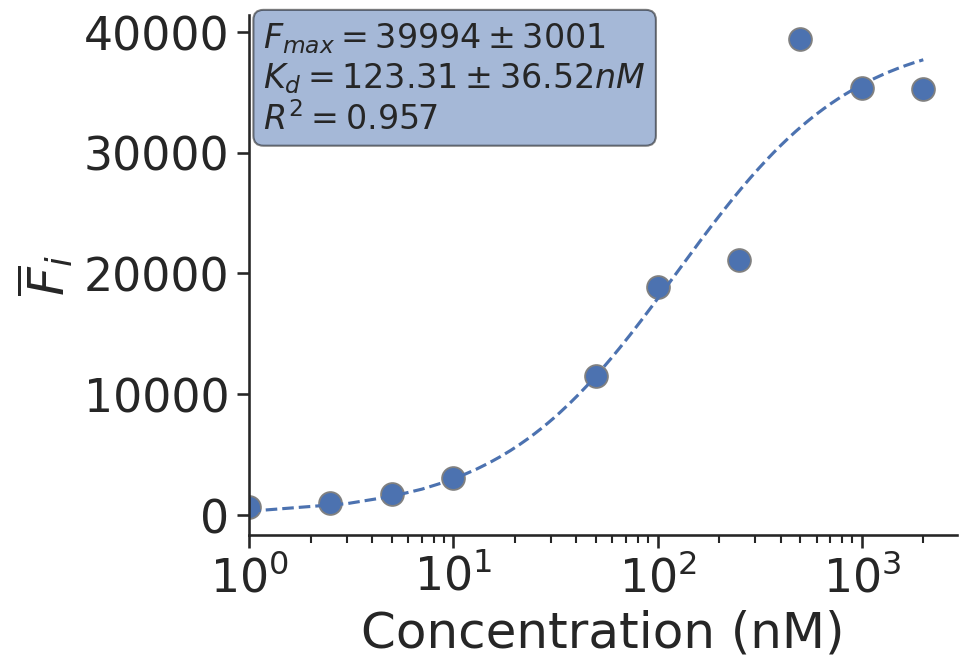

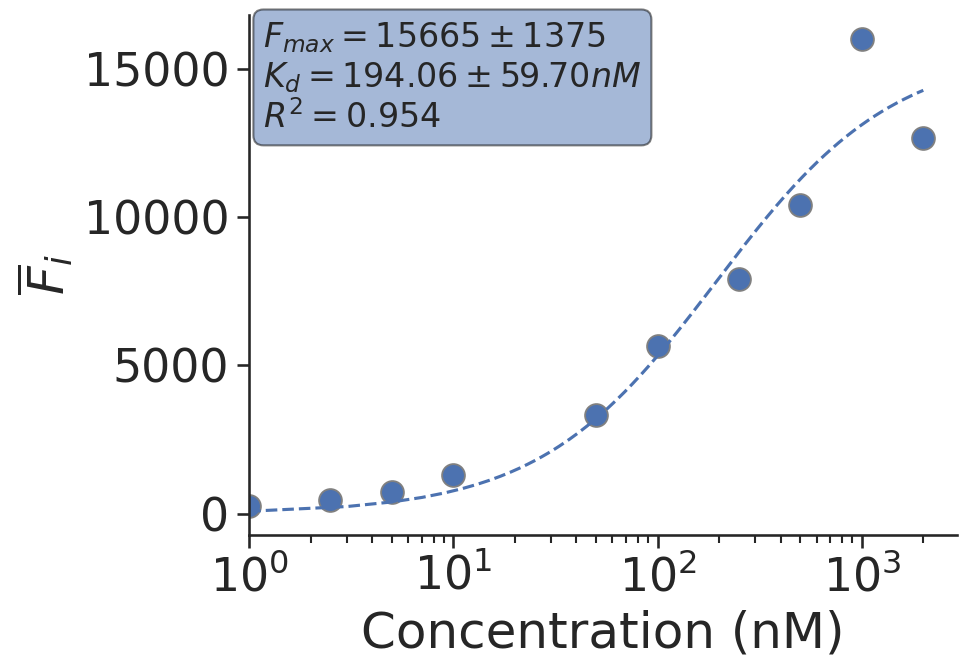

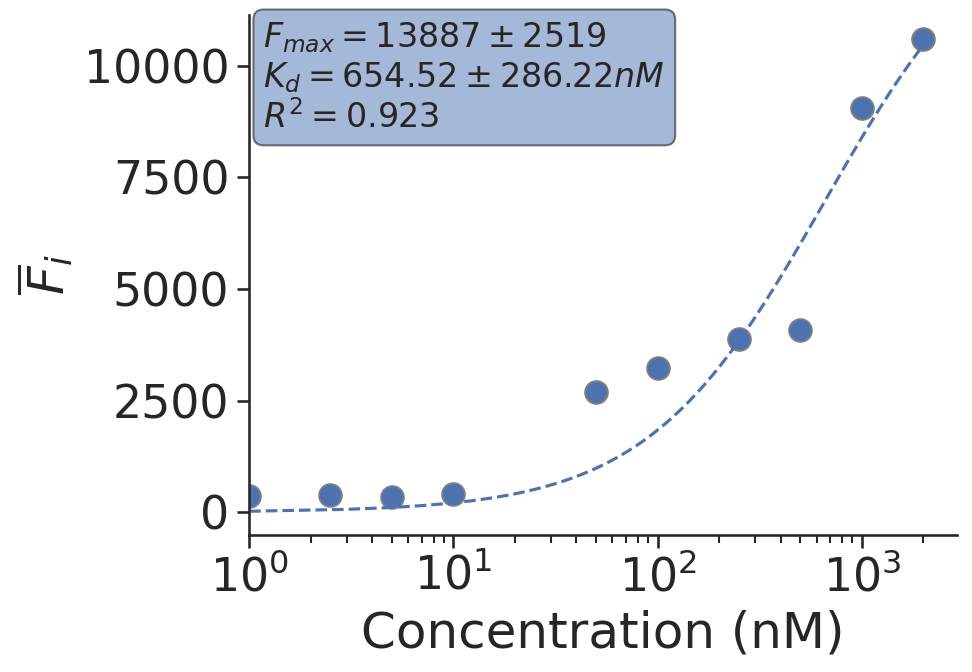

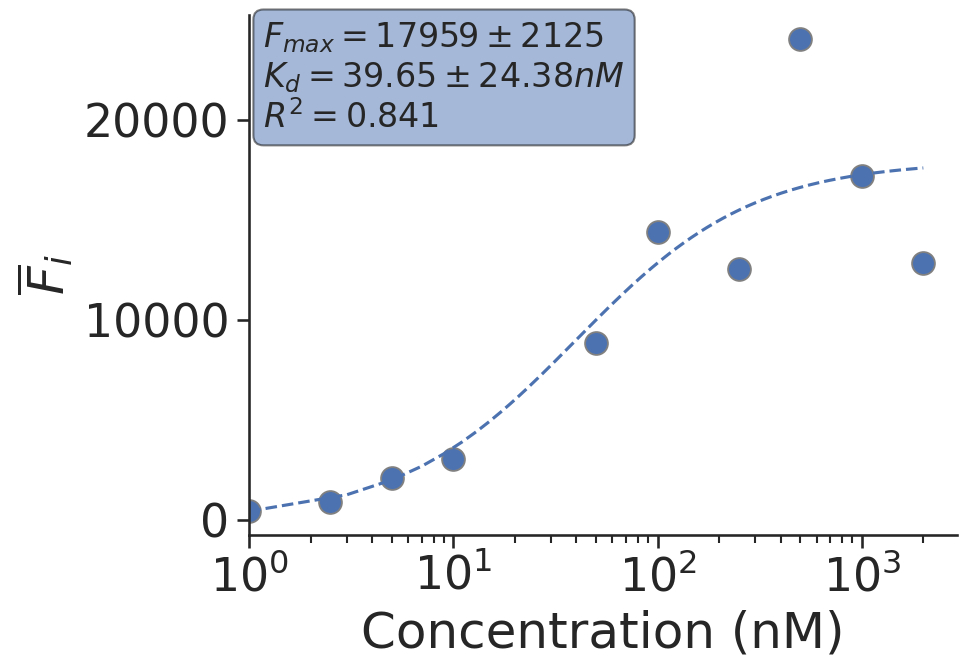

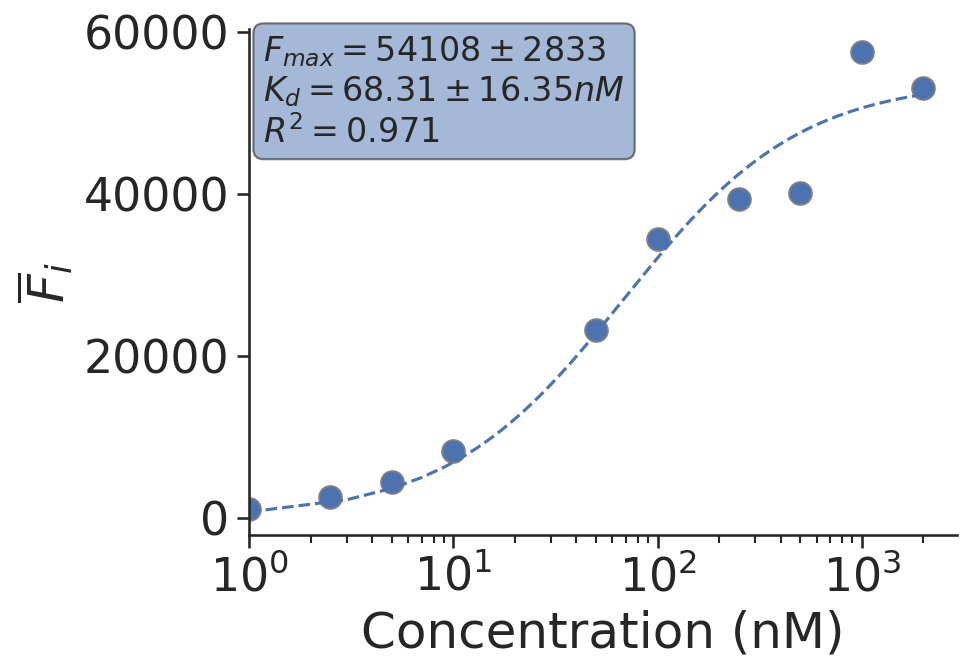

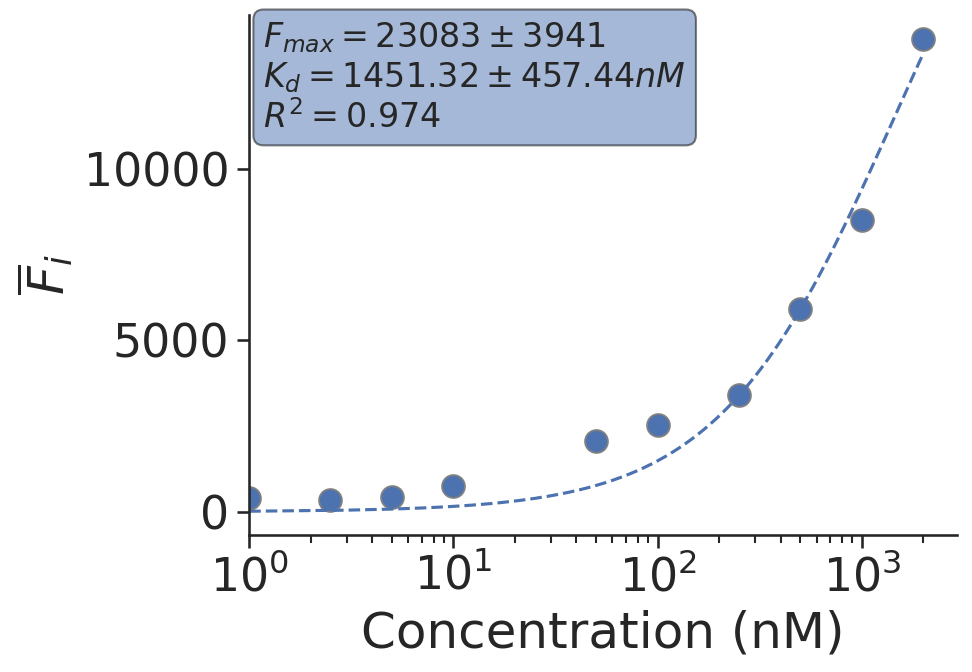

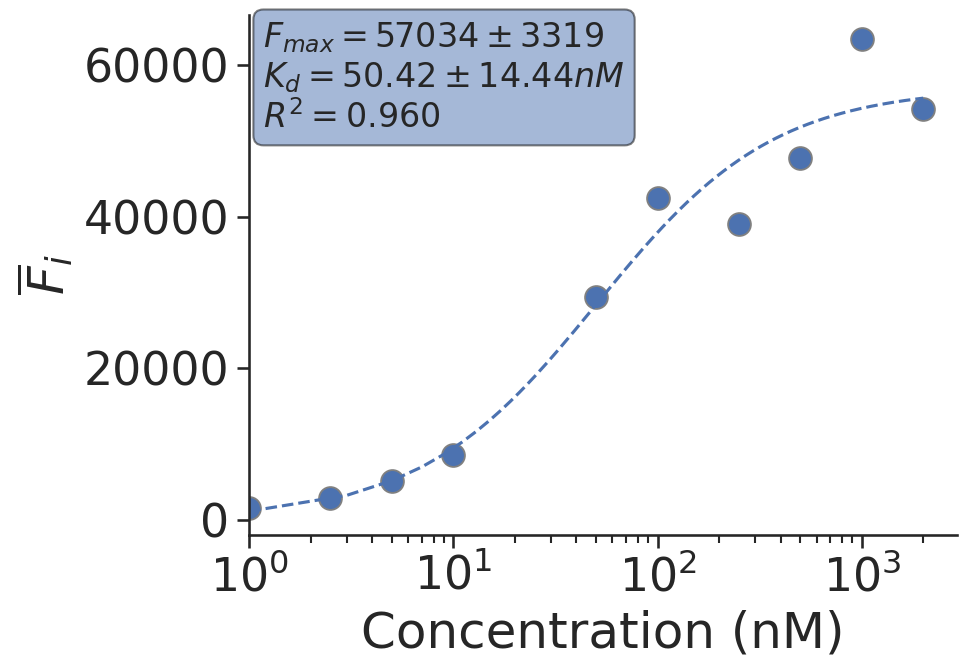

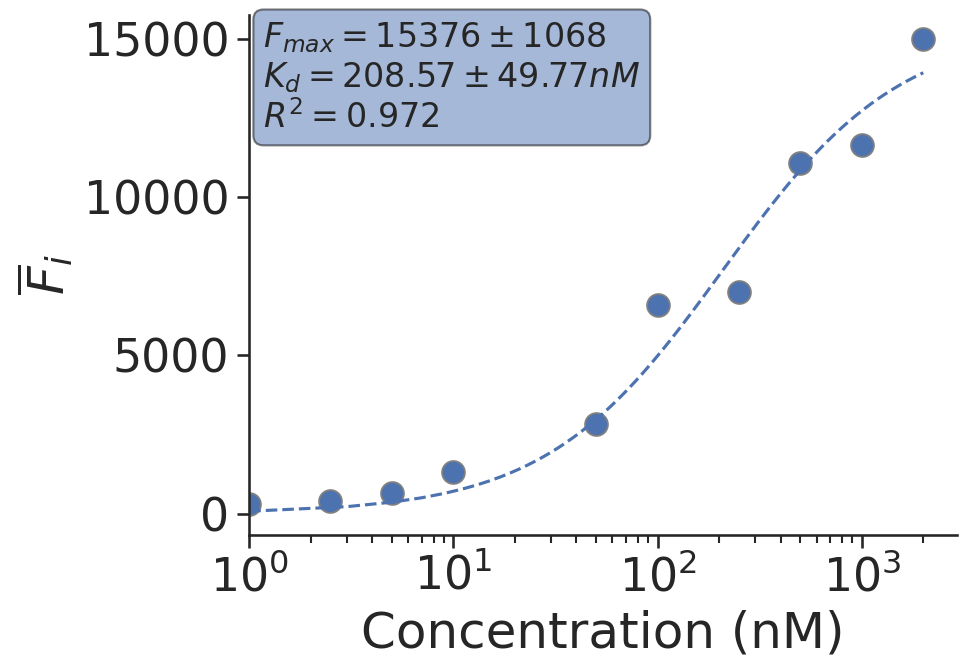

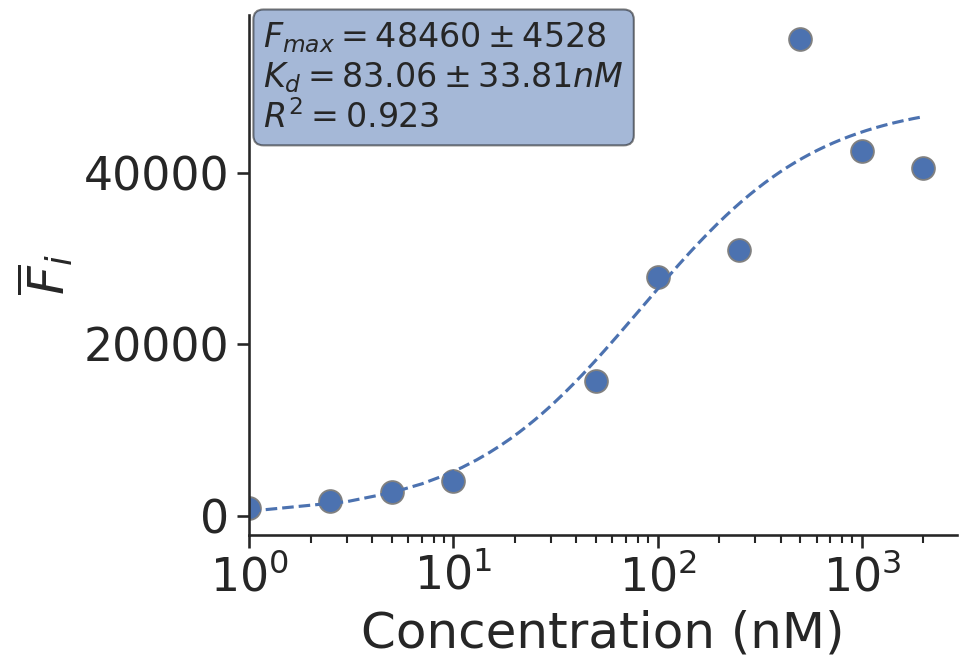

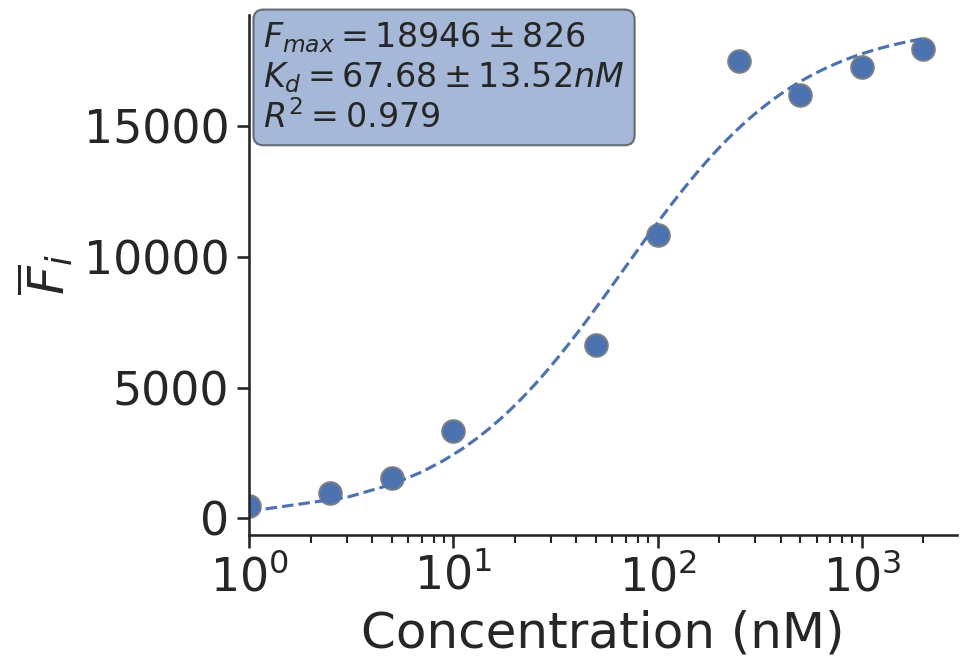

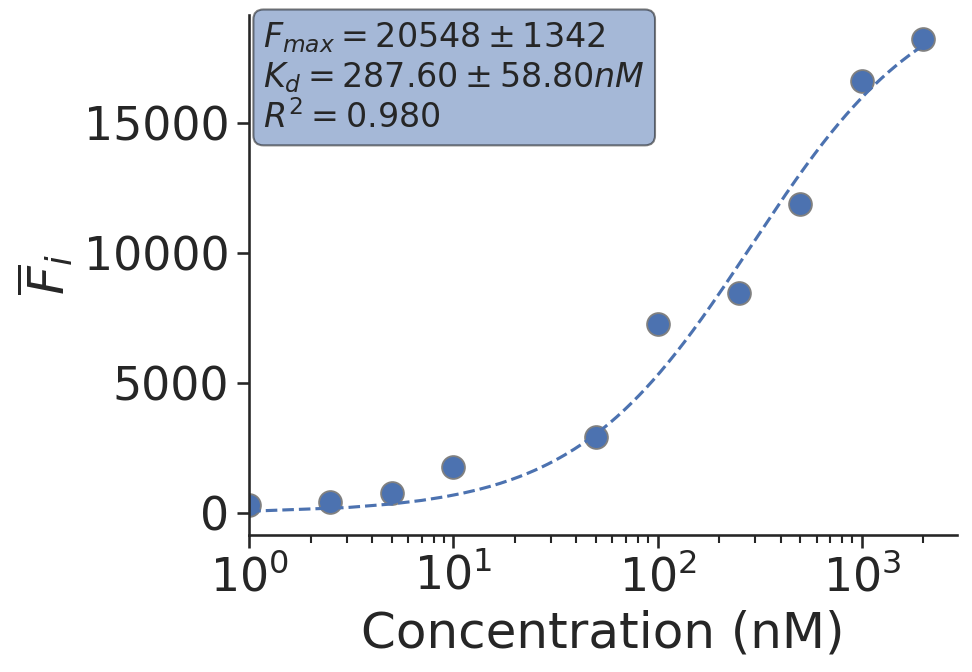

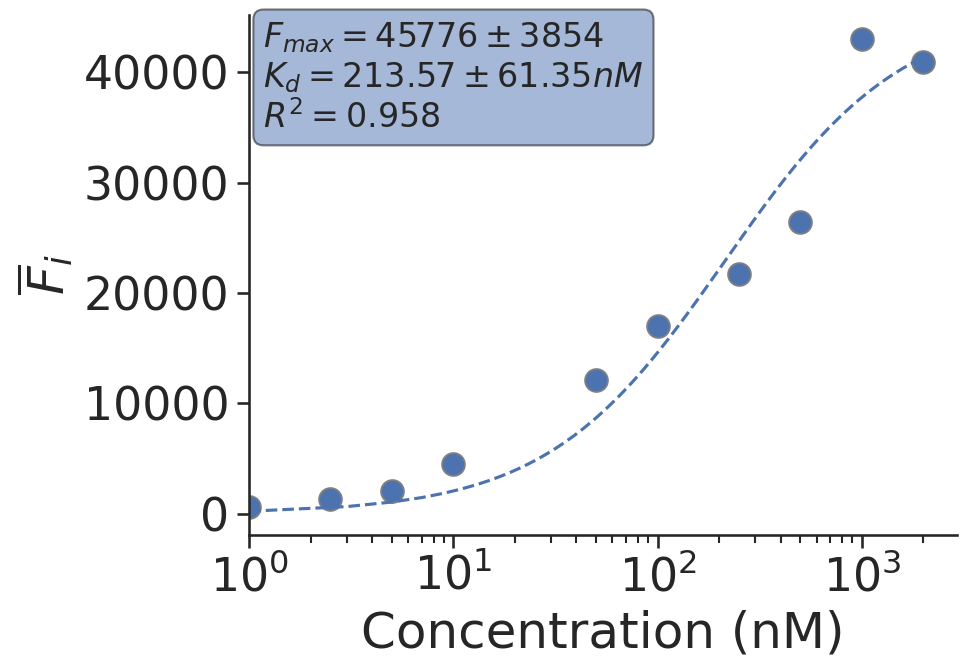

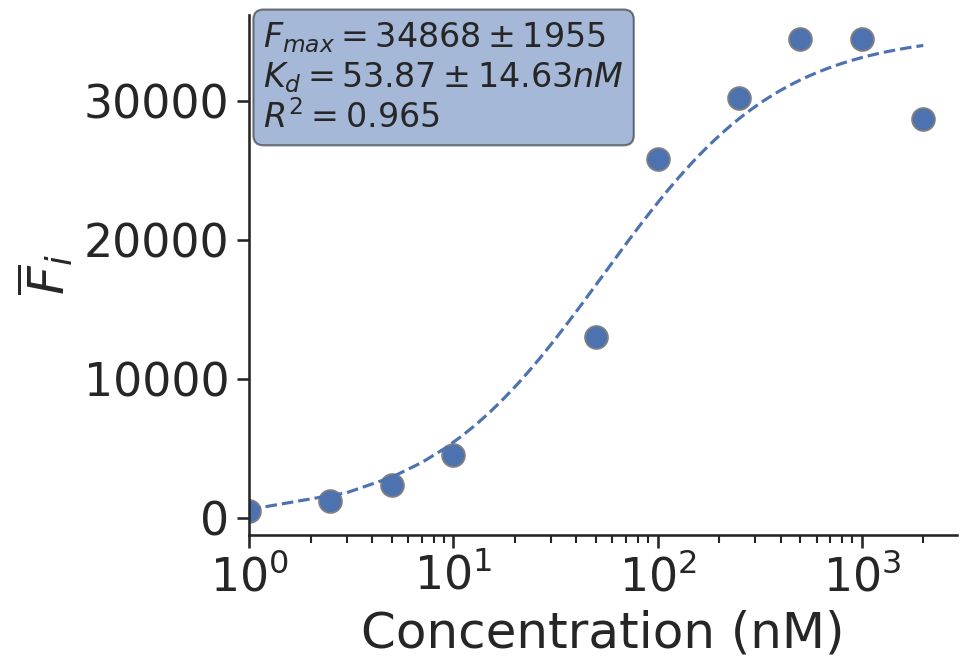

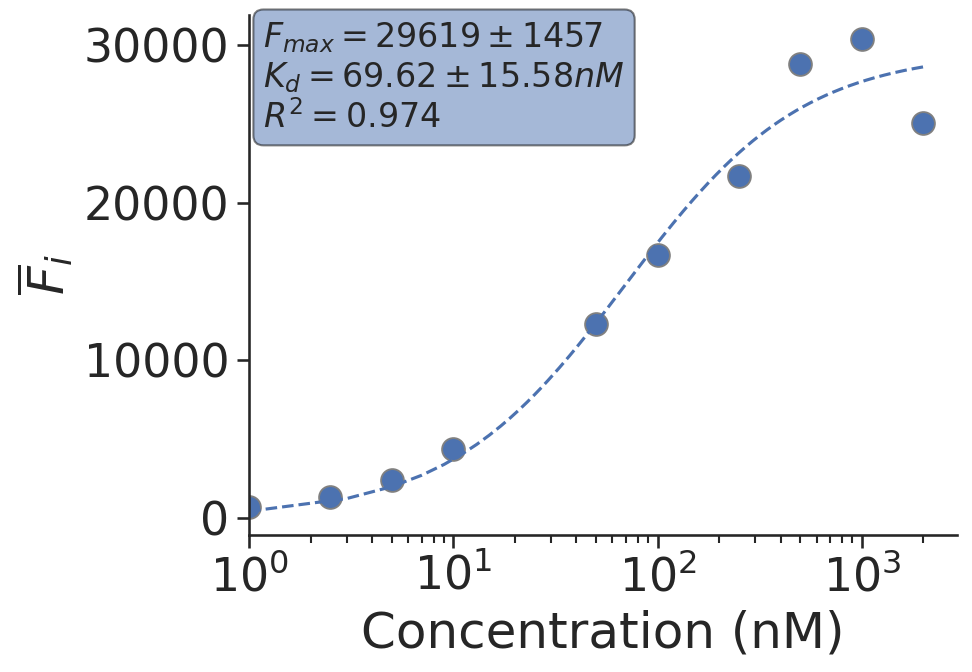

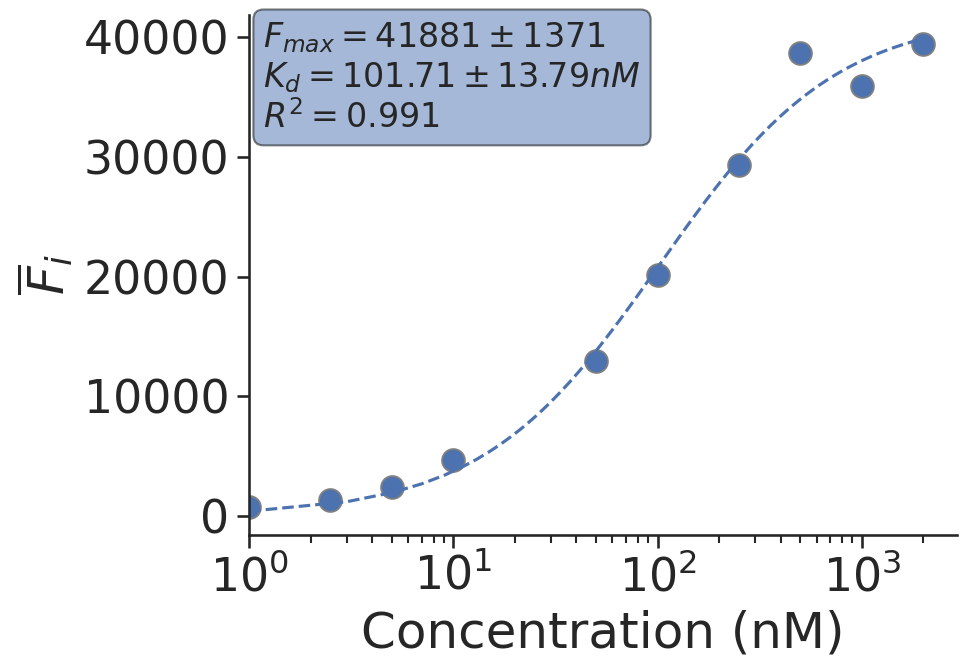

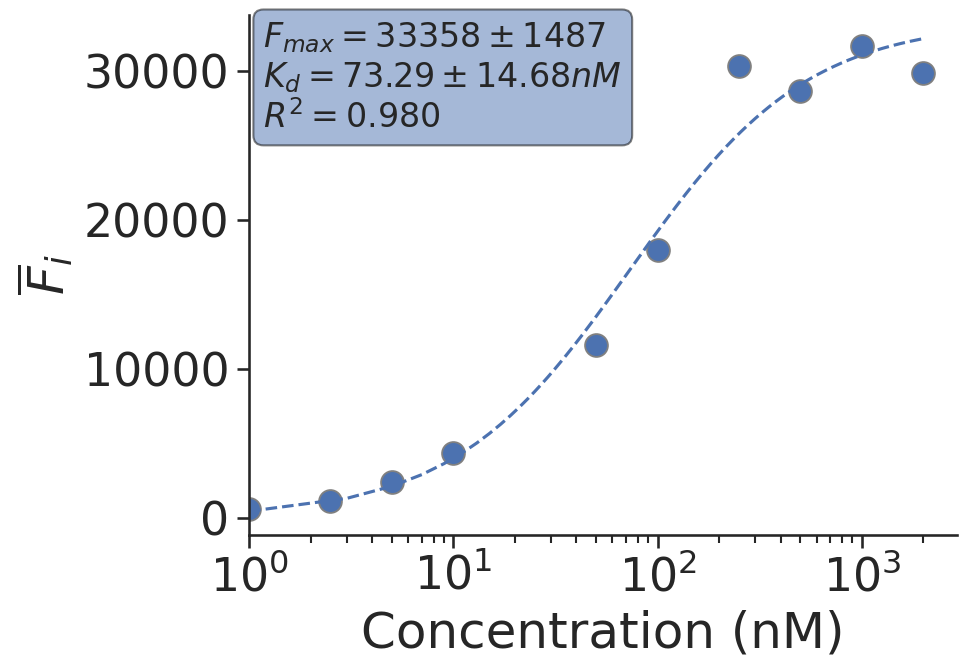

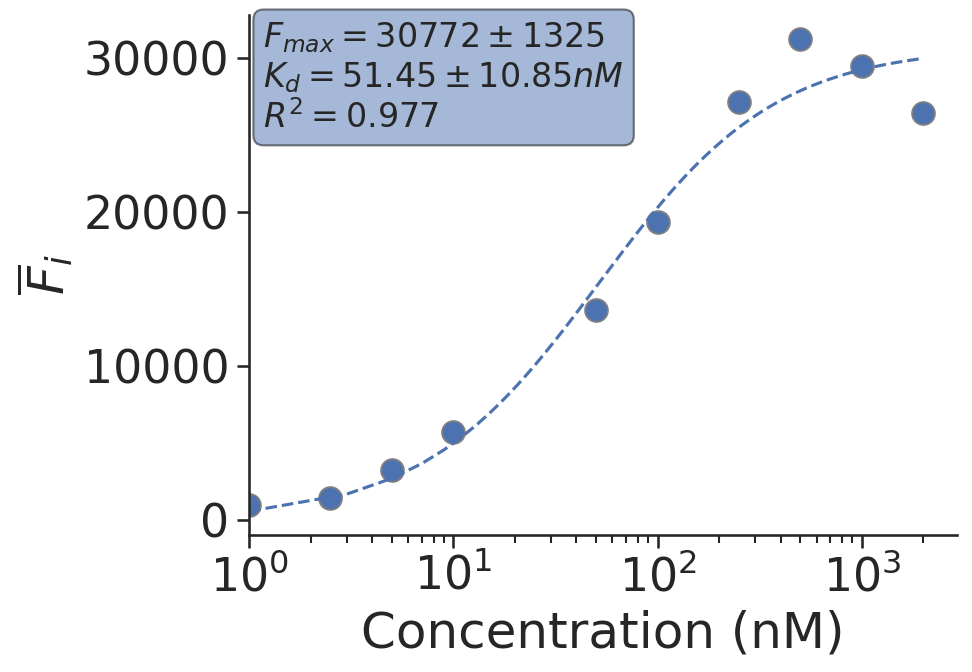

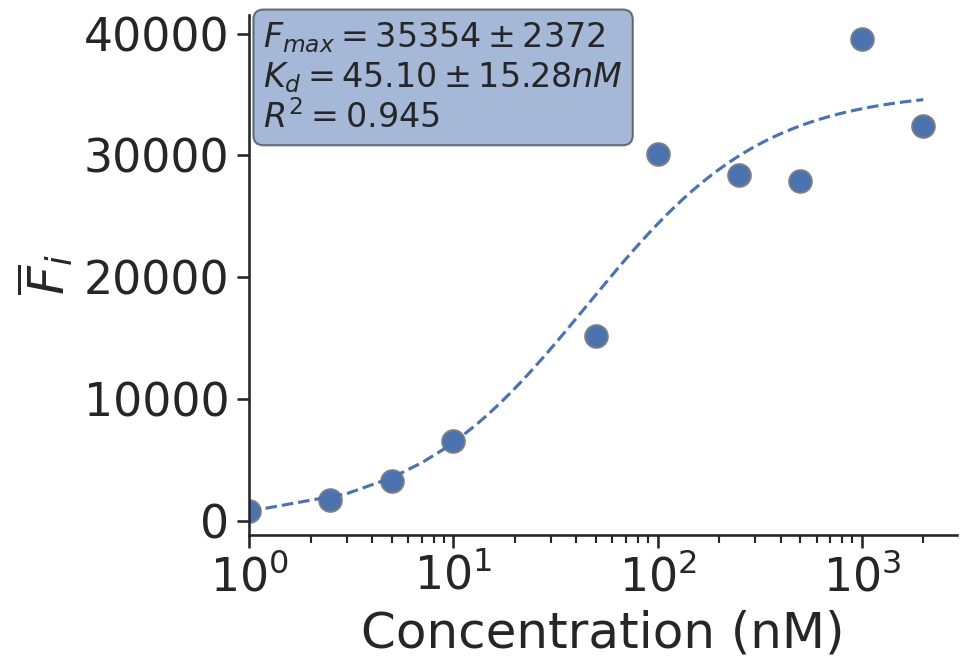

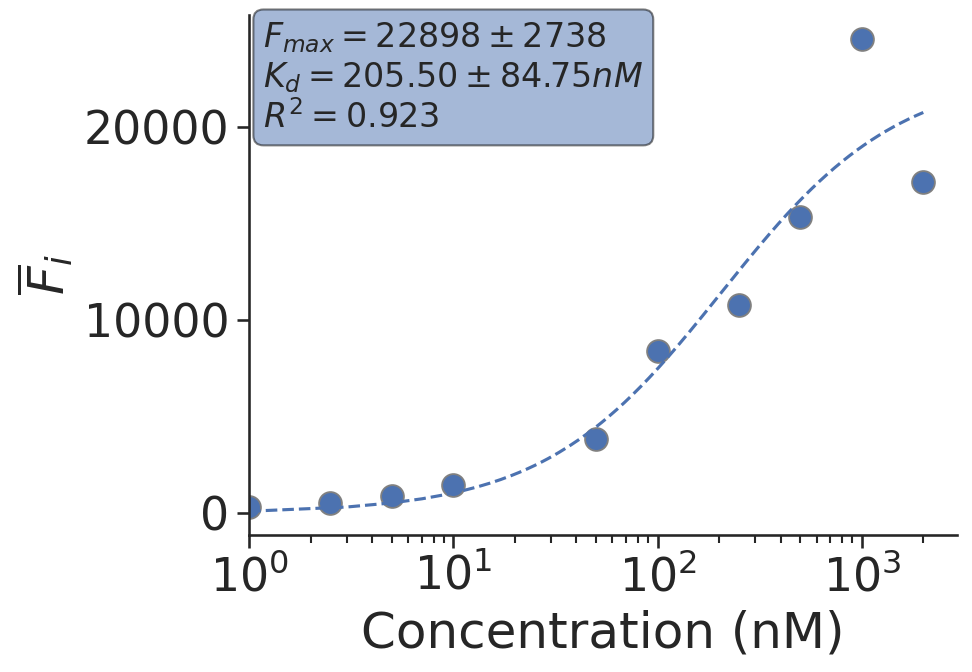

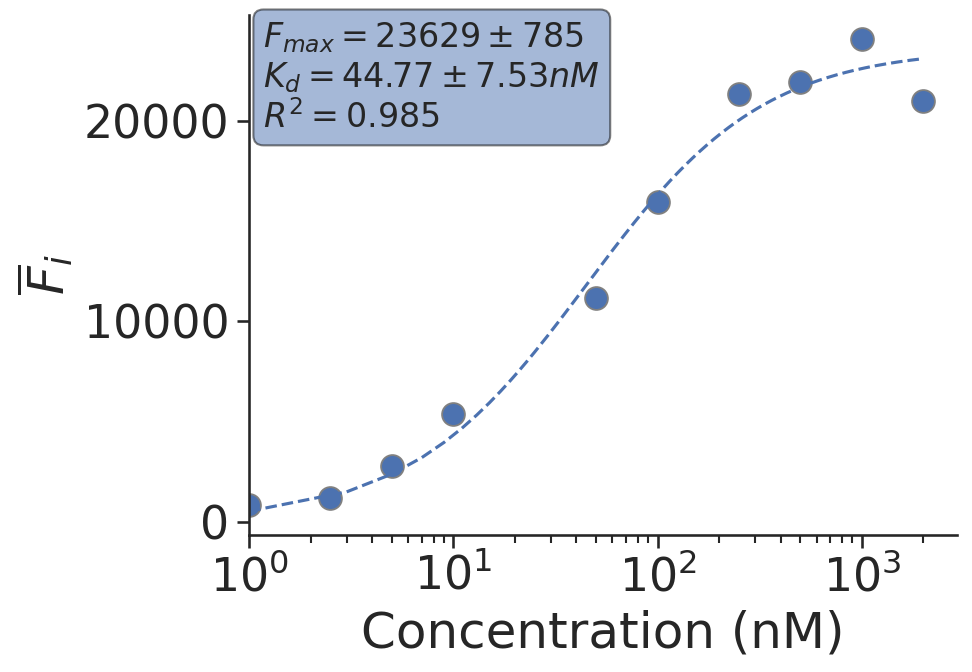

In [11]:
# input data
df = pd.read_csv("barcodes.csv")
df.dropna(axis="index", how="any", inplace=True)
x = df["Concentration"]
x_estimate = np.linspace(1, max(x), 1000)
guess = [60000, 20]
variants = [str(i + 1) for i in range(20)]

for i, v in enumerate(variants):
    y = df[v]
    # run non-linear regression
    fit, pcov = curve_fit(func, x, y, guess)
    perr = np.sqrt(np.diag(pcov))
    # print("F_max: ", fit[0], " +/- ", perr[0])
    # print("Kd: ", fit[1], " +/- ", perr[1])
    y_estimate = [func(conc, fit[0], fit[1]) for conc in x_estimate]
    y_r2 = [func(conc, fit[0], fit[1]) for conc in x]
    r2 = r2_score(y, y_r2)
    # print("R-squared: ", r2)

    # plot data
    textstr = "\n".join(
        (
            r"$F_{max}=%.0f \pm %.0f$" % (fit[0], perr[0]),
            r"$K_d=%.2f \pm %.2f nM$" % (fit[1], perr[1]),
            #    r'$n=%.2f$' %(1),
            r"$R^2=%.3f$" % r2,
        )
    )

    custom_params = {
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.dpi": 150,
        "savefig.dpi": 600,
    }
    sns.set(rc=custom_params, style="ticks", font_scale=2)
    plt.figure(figsize=(7, 5))

    ax = sns.scatterplot(data=df, x=x, y=y, s=120, edgecolor="gray")
    ax.plot(x_estimate, y_estimate, linestyle="dashed")
    ax.set_xscale("log")
    plt.legend(loc="lower right")
    plt.legend([], [], frameon=False)
    props = dict(boxstyle="round", alpha=0.5, edgecolor="black")
    ax.text(
        0.02,
        0.99,
        textstr,
        transform=ax.transAxes,
        fontsize=16,
        verticalalignment="top",
        bbox=props,
    )
    plt.subplots_adjust(bottom=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylabel(r"$\overline{F}_{i}$")
    ax.set_xlabel("Concentration (nM)")
    # ax.set_title(v)
    ax.set_xlim(left=1)
    plt.tight_layout()
    plt.savefig("/projects/brpe7306/fab-library-barcoding/MLE/plots/" + str(v) + ".png")